In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [91]:
df = pd.read_csv("correlation_matrix.txt", delim_whitespace=True)
df.head()

,N0_PCs1,N0_PCs2,N0_PCs3,N0_PCs4,N0_PCs5,N0_PCs6,N0_PCs7,N0_PCs8,N0_PCs9,N0_PCs10,...,rh_precuneus_thickness,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness
N0_PCs1,1.000000,-0.005420,-0.013115,0.009769,0.003141,-0.004473,-0.004571,0.002396,-0.010418,0.001870,...,-0.184495,0.163752,-0.109886,-0.219446,-0.162692,-0.144647,-0.191078,-0.008103,0.023471,0.018778
N0_PCs2,-0.005420,1.000000,-0.051224,0.017160,0.031796,-0.032445,-0.035523,0.017007,-0.001651,-0.012924,...,0.192961,-0.037135,0.019361,0.054105,0.169155,0.312719,0.175876,0.010048,0.109605,0.157985
N0_PCs3,-0.013115,-0.051224,1.000000,0.058091,0.046394,-0.054419,-0.033834,0.002890,0.003966,-0.014559,...,-0.220733,0.028183,-0.074705,-0.203210,-0.219019,-0.133208,-0.202305,-0.064270,-0.034660,-0.022958
N0_PCs4,0.009769,0.017160,0.058091,1.000000,-0.004821,0.009855,0.003768,-0.004175,-0.005239,0.000564,...,-0.152954,0.128319,-0.064360,-0.144887,-0.250773,-0.036214,-0.069215,-0.009921,0.092130,0.056440
N0_PCs5,0.003141,0.031796,0.046394,-0.004821,1.000000,0.020689,0.008726,0.007339,0.000439,0.006672,...,-0.003523,-0.123588,-0.175788,-0.115359,0.096985,-0.135647,-0.131000,-0.125013,-0.068539,0.013404


In [98]:
diff_traits = [c for c in df.columns if c.startswith("ND_") or c.startswith("NF_") or c.startswith("NO_")]
print(len(diff_traits))
func_traits = [c for c in df.columns if c.startswith("conn")] + "ContA ContB ContC DefaultA DefaultB DefaultC DorsAttnA DorsAttnB LimbicA LimbicB SalVentAttnA SalVentAttnB SomMotA SomMotB TempPar VisCent VisPeri".split()
print(len(func_traits))
t1_traits = [c for c in df.columns if (not (c in diff_traits)) and (not (c in func_traits))]
print(len(t1_traits))

211
153
235


In [99]:
df_dict = df.to_dict()
domain = []
corr = []
for i, t1 in enumerate(df.columns):
    for t2 in df.columns[i+1:]:
        if t1 in diff_traits:
            d = "DIFF"
        elif t1 in func_traits:
            d = "FUNC"
        else:
            d = "T1"
        if t2 in diff_traits:
            if d == "DIFF" and t1[:3] == t2[:3]: # skip correlations within the same diff domain, since they are equal to 0 by definition (PCs)
                continue
            d = f"{d} vs DIFF"
        elif t2 in func_traits:
            d = f"{d} vs FUNC" if d == "T1" else f"FUNC vs {d}" 
        else:
            d = f"T1 vs {d}"
        domain.append(d)
        corr.append(df_dict[t1][t2])        

In [102]:
df_corr = pd.DataFrame({"Modality":domain,"Correlation":np.array(corr)})

In [103]:
df_corr.head()

,Modality,Correlation
0,T1 vs T1,-0.005420
1,T1 vs T1,-0.013115
2,T1 vs T1,0.009769
3,T1 vs T1,0.003141
4,T1 vs T1,-0.004473


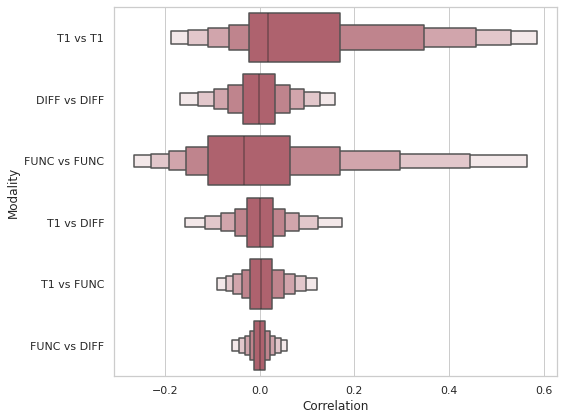

In [108]:
sns.set(font_scale=1.1)
sns.set_theme(style="whitegrid")

order = ["T1 vs T1", "DIFF vs DIFF", "FUNC vs FUNC", "T1 vs DIFF", "T1 vs FUNC", "FUNC vs DIFF"]

fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.boxenplot(y="Modality", x="Correlation",
              color="#BB5566", order=order, k_depth=5, showfliers=False,
              scale="area", data=df_corr, ax=ax, orient='h')
plt.tight_layout()
if True:
    outf = "figures/correlation_boxplot.png"
    plt.savefig(outf, facecolor="w", dpi=300)

In [38]:
# New correlation plot. Oct 2022.

fname = "/cluster/projects/p33/users/elizabept/multimodal/discovery/phenos/results/correlation_matrix_resid.txt"
df_pheno_corr = pd.read_csv(fname, delim_whitespace=True)
print(df_pheno_corr.shape)
df_pheno_corr.head()

(599, 599)


,NF_PCs1,NF_PCs2,NF_PCs3,NF_PCs4,NF_PCs5,NF_PCs6,NF_PCs7,NF_PCs8,NF_PCs9,NF_PCs10,...,rh_precuneus_thickness,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness
NF_PCs1,1.000000,0.122075,0.151727,-0.028499,-0.005737,-0.072818,0.024175,0.097906,-0.104437,-0.106054,...,0.098162,-0.146753,-0.048615,0.099606,0.123502,-0.061577,0.031469,-0.020299,-0.162209,-0.119604
NF_PCs2,0.122075,1.000000,-0.065165,0.010663,0.008986,0.011636,-0.018612,-0.001918,-0.006299,0.025616,...,-0.000356,0.042155,0.002096,0.036772,0.009739,-0.116541,-0.013824,0.029982,-0.026946,-0.033955
NF_PCs3,0.151727,-0.065165,1.000000,0.040767,-0.023052,0.004368,0.005339,-0.013726,0.005069,0.070588,...,-0.023873,0.044957,0.038770,0.064125,-0.021974,-0.101966,0.028353,0.037928,-0.003266,0.016883
NF_PCs4,-0.028499,0.010663,0.040767,1.000000,0.048688,-0.004117,-0.012544,-0.048850,-0.073186,-0.016642,...,0.013260,-0.021294,0.006827,0.021974,0.045162,-0.024765,-0.016320,0.000957,-0.005710,-0.058515
NF_PCs5,-0.005737,0.008986,-0.023052,0.048688,1.000000,0.011408,0.037081,0.026284,0.121990,0.000784,...,-0.053867,0.067874,-0.007304,-0.071752,-0.146965,0.094958,0.013719,0.020279,0.017017,0.136184


In [57]:
fname = "/cluster/projects/p33/users/elizabept/multimodal/discovery/phenos/results/correlation_p_matrix_resid.txt"
df_pheno_corr_pval = pd.read_csv(fname, delim_whitespace=True)
print(df_pheno_corr_pval.shape)
df_pheno_corr_pval.head()

(599, 599)


,NF_PCs1,NF_PCs2,NF_PCs3,NF_PCs4,NF_PCs5,NF_PCs6,NF_PCs7,NF_PCs8,NF_PCs9,NF_PCs10,...,rh_precuneus_thickness,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness
NF_PCs1,0.000000e+00,2.890000e-98,2.450000e-151,9.870000e-07,3.250000e-01,5.840000e-36,3.300000e-05,1.040000e-63,2.750000e-72,1.700000e-74,...,4.880000e-64,1.330000e-141,6.710000e-17,6.860000e-66,1.510000e-100,3.580000e-26,6.500000e-08,4.910000e-04,5.750000e-173,2.240000e-94
NF_PCs2,2.890000e-98,0.000000e+00,4.050000e-29,6.710000e-02,1.230000e-01,4.570000e-02,1.390000e-03,7.420000e-01,2.790000e-01,1.090000e-05,...,9.510000e-01,4.450000e-13,7.190000e-01,2.690000e-10,9.450000e-02,1.140000e-89,1.760000e-02,2.620000e-07,3.700000e-06,5.480000e-09
NF_PCs3,2.450000e-151,4.050000e-29,0.000000e+00,2.510000e-12,7.540000e-05,4.530000e-01,3.590000e-01,1.840000e-02,3.840000e-01,6.900000e-34,...,4.140000e-05,1.140000e-14,2.750000e-11,3.010000e-28,1.610000e-04,5.620000e-69,1.120000e-06,7.290000e-11,5.750000e-01,3.740000e-03
NF_PCs4,9.870000e-07,6.710000e-02,2.510000e-12,0.000000e+00,6.030000e-17,4.800000e-01,3.120000e-02,4.760000e-17,2.630000e-36,4.270000e-03,...,2.280000e-02,2.560000e-04,2.410000e-01,1.610000e-04,8.620000e-15,2.110000e-05,5.070000e-03,8.690000e-01,3.270000e-01,8.690000e-24
NF_PCs5,3.250000e-01,1.230000e-01,7.540000e-05,6.030000e-17,0.000000e+00,5.010000e-02,1.900000e-10,6.370000e-06,3.950000e-98,8.930000e-01,...,2.130000e-20,1.870000e-31,2.100000e-01,5.830000e-35,5.190000e-142,5.030000e-60,1.850000e-02,4.970000e-04,3.480000e-03,4.910000e-122


In [39]:
fname = "/cluster/projects/p33/users/elizabept/multimodal/discovery/ldsc/results/rg/summary.txt"
df_rg = pd.read_csv(fname, delim_whitespace=True)
print(df_rg.shape)
df_rg.head()

(169653, 12)


,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,3rd_Ventricle,4th_Ventricle,0.3369,0.0431,7.8166,5.425700e-15,0.3201,0.0277,1.0241,0.0094,0.3023,0.0054
1,3rd_Ventricle,5th_Ventricle,-0.0991,0.0846,-1.1708,2.416600e-01,0.0653,0.0139,1.0043,0.0060,-0.0584,0.0051
2,3rd_Ventricle,Brain_Stem,-0.2303,0.0538,-4.2812,1.859100e-05,0.3145,0.0254,1.0116,0.0080,-0.1419,0.0056
3,3rd_Ventricle,CC_Anterior,-0.3360,0.0420,-7.9981,1.263500e-15,0.3178,0.0259,1.0198,0.0085,-0.2834,0.0058
4,3rd_Ventricle,CC_Central,-0.4607,0.0355,-12.9656,1.917800e-38,0.2988,0.0206,1.0091,0.0070,-0.4413,0.0057


In [40]:
(~df_pheno_corr.columns.isin(df_rg.p1)).sum(), (~df_rg.p1.isin(df_pheno_corr.columns)).sum()

(18, 68)

In [41]:
df_pheno_corr.columns[~df_pheno_corr.columns.isin(df_rg.p1)]

Index(['NF_PCs2', 'NF_PCs4', 'NF_PCs58', 'conn34', 'conn53', 'conn72',
       'conn76', 'conn101', 'conn110', 'conn113', 'conn114', 'conn119',
       'conn122', 'conn124', 'conn125', 'conn126', 'conn129', 'VisPeri'],
      dtype='object')

In [58]:
traits = list(df_pheno_corr.columns)
for t1, t2, rg, p in df_rg["p1 p2 rg p".split()].itertuples(index=False):
    if t1 in traits and t2 in traits:
        i1, i2 = traits.index(t1), traits.index(t2)
        if p*(599**2 - 599)/2 > 0.05:
            rg = 0
        if i1 > i2:
            df_pheno_corr.values[i2,i1] = rg
        else:
            df_pheno_corr.values[i1,i2] = rg

# zero out phenotypics correlations not passing bonferroni corrections
for i in range(599):
    for j in range(i+1, 599):
        if df_pheno_corr_pval.values[j,i]*(599**2 - 599)/2 > 0.05:
            df_pheno_corr.values[j,i] = 0

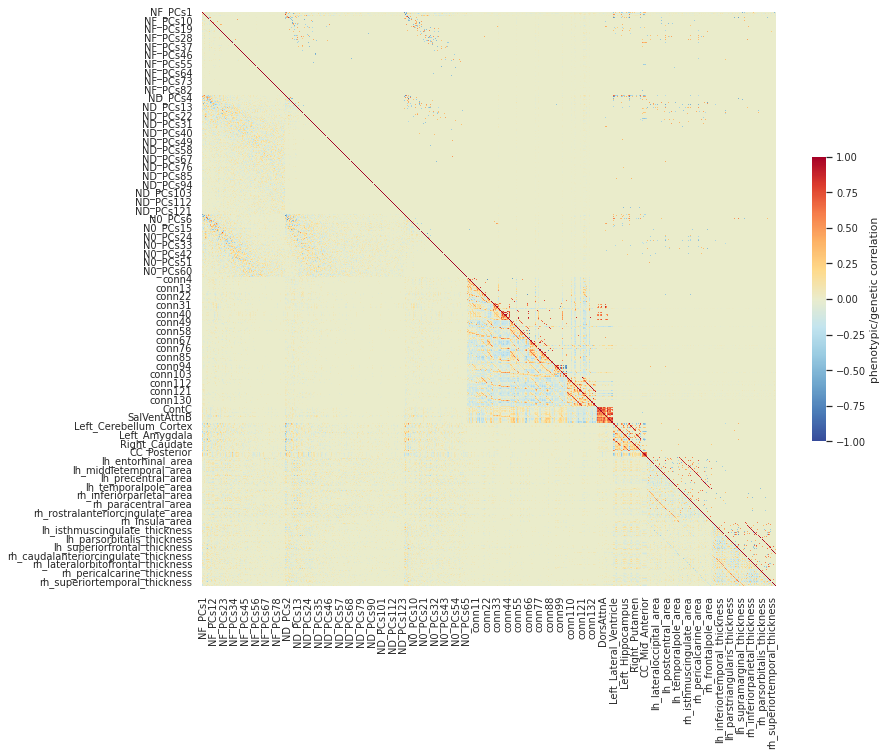

In [65]:
sns.set_style(style='white')
sns.set(font_scale=0.9)

fig, ax = plt.subplots(1,1,figsize=(13,13))
# custom colormap in matplotlib: https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html
sunset_colors = ['#364B9A', '#4A7BB7', '#6EA6CD', '#98CAE1', '#C2E4EF', '#EAECCC', '#FEDA8B', '#FDB366', '#F67E4B', '#DD3D2D', '#A50026']
sunset_cmap = LinearSegmentedColormap.from_list("sunset", sunset_colors)
sns.heatmap(df_pheno_corr, vmin=-1, vmax=1, square=True, linewidths=0, center=0, cmap=sunset_cmap,
            cbar_kws={"shrink": .35, 'label': "phenotypic/genetic correlation", "orientation":"vertical"}, ax=ax)
plt.tight_layout()
if True:
    outf = "figures/correlation_heatmap_resid_pheno_1max221014.png"
    plt.savefig(outf, facecolor="w", dpi=300)

In [44]:
traits = list(df_pheno_corr.columns)
n = 0
for t1, t2, rg, p in df_rg["p1 p2 rg p".split()].itertuples(index=False):
    if t1 in traits and t2 in traits:
        n += 1

In [45]:
pp1 = list(df_rg.p1)
pp2 = list(df_rg.p2)
for t in traits:
    if (not t in pp1) and (not t in pp2):
        print(t)

NF_PCs2
NF_PCs4
NF_PCs58
conn34
conn53
conn72
conn76
conn101
conn110
conn113
conn114
conn119
conn122
conn124
conn125
conn126
conn129


In [35]:
(599*599 - 599)/2

179101.0

In [50]:
pcorr, gcorr = [], []
for i in range(599):
    for j in range(i+1, 599):
        pcorr.append(df_pheno_corr.values[j,i])
        gcorr.append(df_pheno_corr.values[i,j])

In [54]:
from scipy.stats import pearsonr, spearmanr

In [56]:
pearsonr(pcorr, gcorr)

(0.5532592965620784, 0.0)